In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [562]:
data = pd.read_csv("./input/project/mushroom_cleaned.csv")

In [563]:
df = pd.DataFrame(data)

In [564]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


Check for Null values

In [566]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

There is no null value in dataset.

Verify the dataset's balance between edible and non-edible mushrooms by assessing whether it contains a relatively equal proportion of both categories.

In [567]:
df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [568]:
df.isin([np.inf, -np.inf]).sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

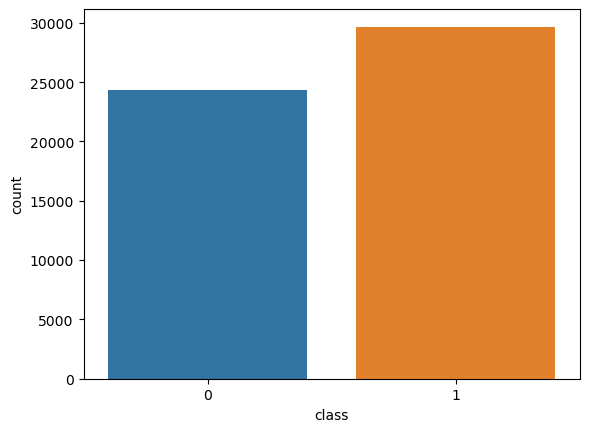

In [569]:
sns.countplot(data=df, x='class')

The dataset exhibits near parity between edible and non-edible mushroom classes, suggesting a balanced distribution that does not necessitate corrective measures.

Visualize the distribution of independent features by plotting histograms.

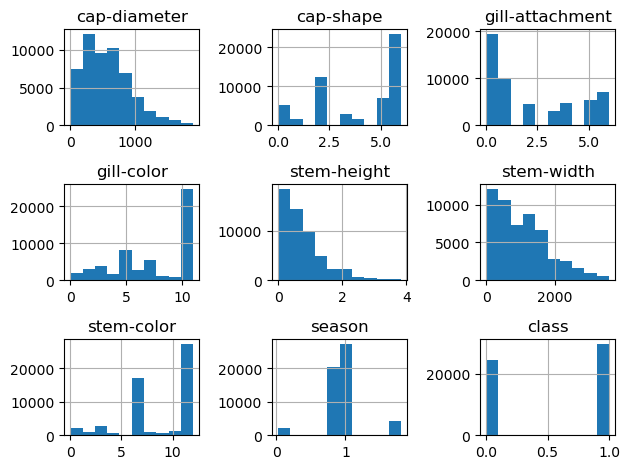

In [570]:
df.hist()
plt.tight_layout()

We can also use seaborn to plot histograms. Keep kde=True to plot density along with histogram

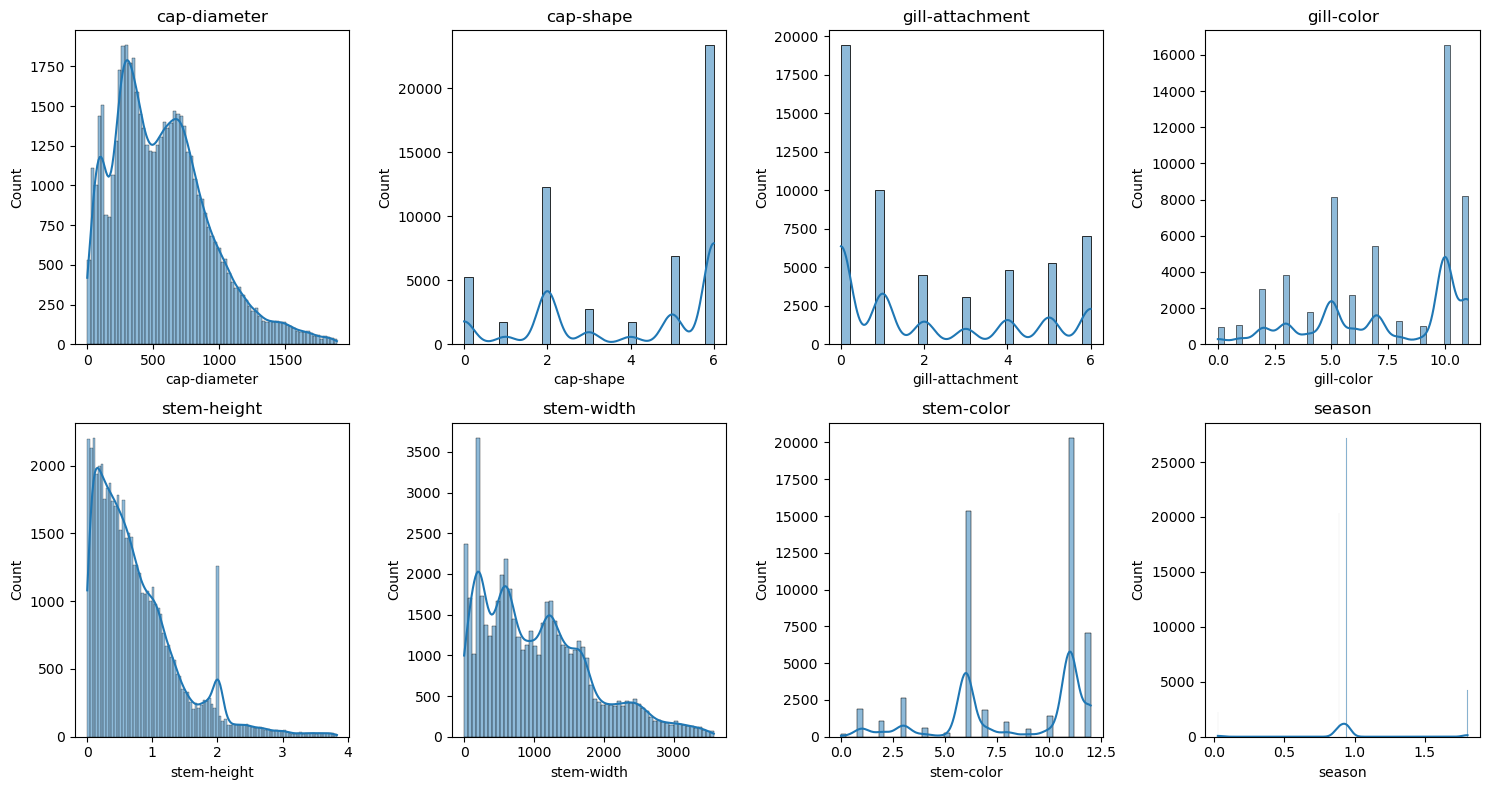

In [571]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axs[i], kde=True)  
    axs[i].set_title(column)  

plt.tight_layout()  
plt.show() 

Plot boxplots for identifying outliers and detecting deviations in data

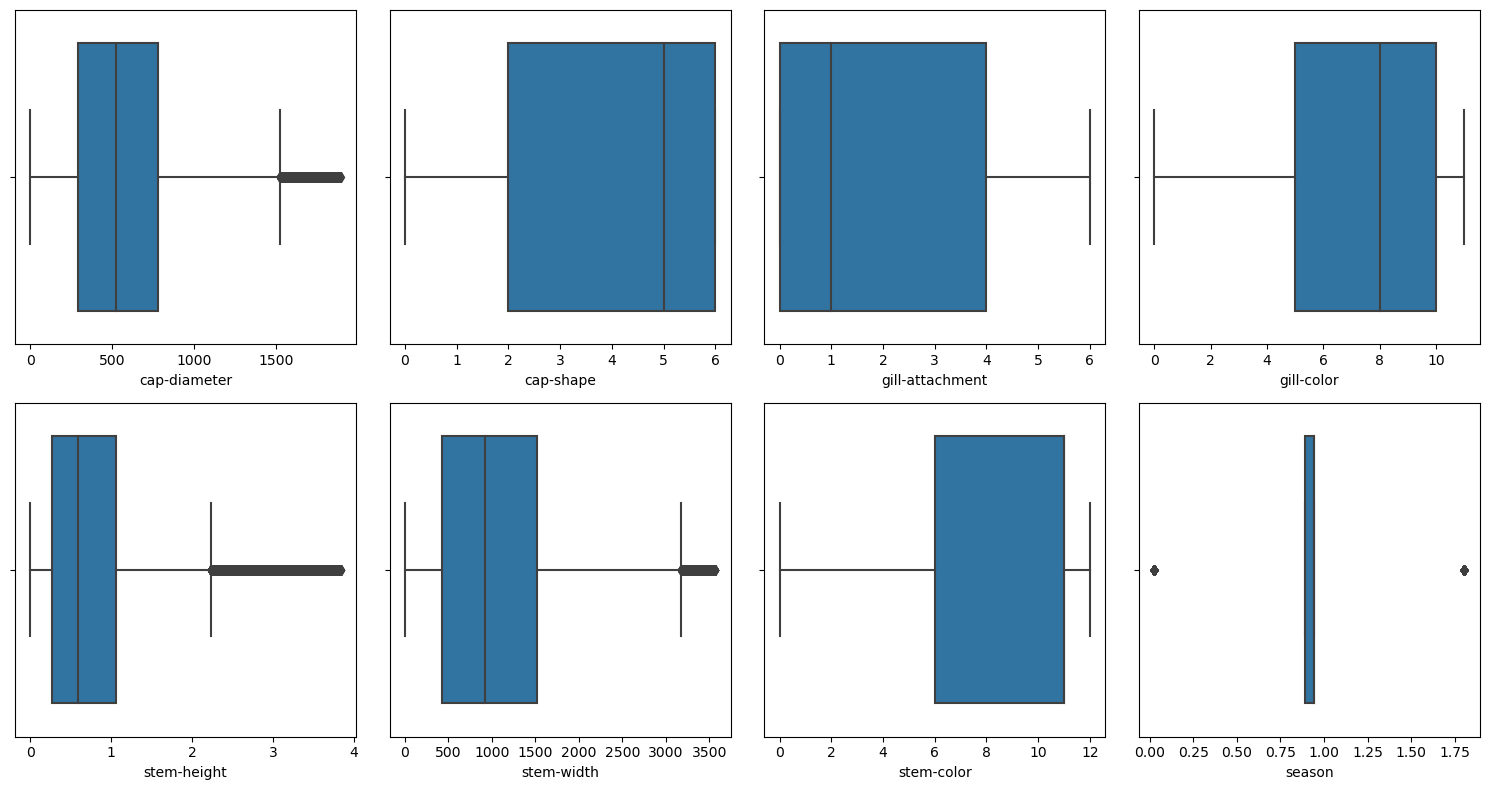

In [572]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axs[i])  

plt.tight_layout()  
plt.show() 

Remove datapoint that deviate from the mean by more than 3 standard deviations.

In [573]:
features = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'season']
index_list = []

for f in features:
    # Calculate mean and standard deviation
    mean = np.mean(df[f])
    std = np.std(df[f])

    # Calculate z-scores
    z_scores = (df[f] - mean) / std

    # Define threshold (e.g., 3 standard deviations)
    threshold = 3

    outliers = df[abs(z_scores) > threshold]
    index_list.extend(outliers.index)
    print(f"Outliers based on z-scores for feature {f}: ", len(outliers))

Outliers based on z-scores for feature cap-diameter:  499
Outliers based on z-scores for feature cap-shape:  0
Outliers based on z-scores for feature gill-attachment:  0
Outliers based on z-scores for feature gill-color:  0
Outliers based on z-scores for feature stem-height:  887
Outliers based on z-scores for feature stem-width:  222
Outliers based on z-scores for feature stem-color:  0
Outliers based on z-scores for feature season:  2219


In [574]:
# Remove rows containing outliers
df = df.drop(index=index_list).reset_index(drop=True)

Lets look into correlaiom matrix

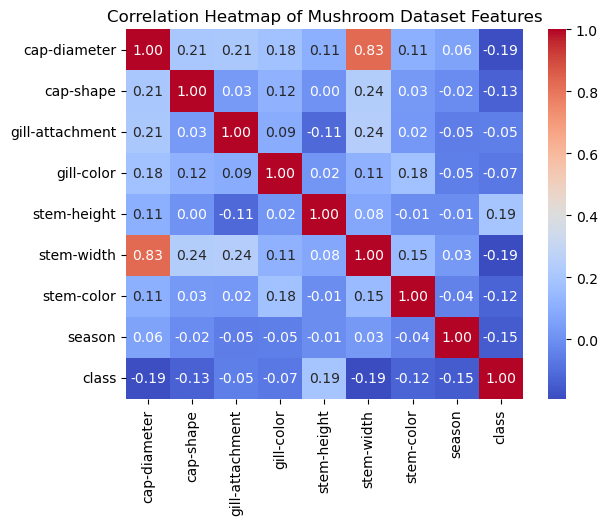

In [575]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Mushroom Dataset Features')
plt.show()

In [576]:
corr_matrix["class"].sort_values(ascending=False)

class              1.000000
stem-height        0.191346
gill-attachment   -0.051274
gill-color        -0.070350
stem-color        -0.123636
cap-shape         -0.134577
season            -0.149322
cap-diameter      -0.185295
stem-width        -0.192857
Name: class, dtype: float64

In [577]:
df = df.drop(columns=['gill-attachment', 'gill-color', 'season', 'cap-diameter'])

In [578]:
df

,cap-shape,stem-height,stem-width,stem-color,class
0,6,0.286062,1311,11,1
1,4,1.189292,1681,11,1
2,4,0.548675,1220,11,1
3,6,0.254230,1239,11,1
4,6,0.950553,1445,11,1
...,...,...,...,...,...
50392,5,0.887740,569,12,1
50393,2,1.186164,490,12,1
50394,5,0.915593,584,12,1
50395,2,1.034963,491,12,1


In [579]:
from sklearn.preprocessing import StandardScaler

In [580]:
std =  StandardScaler()

In [581]:
X = df.drop(columns=['class'])
y = df['class']

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, shuffle=True)

In [583]:
X_train = std.fit_transform(X_train)

In [584]:
X_test = std.transform(X_test)

In [585]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [586]:
predictions = model_rf.predict(X_test)

In [587]:
from sklearn.metrics import accuracy_score

accuracy = model_rf.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8749007936507937


In [588]:
precision_score(y_test, predictions)

0.8908328777109532

In [589]:
recall_score(y_test, predictions)

0.8807207207207207

In [590]:
from sklearn.metrics import roc_curve, auc

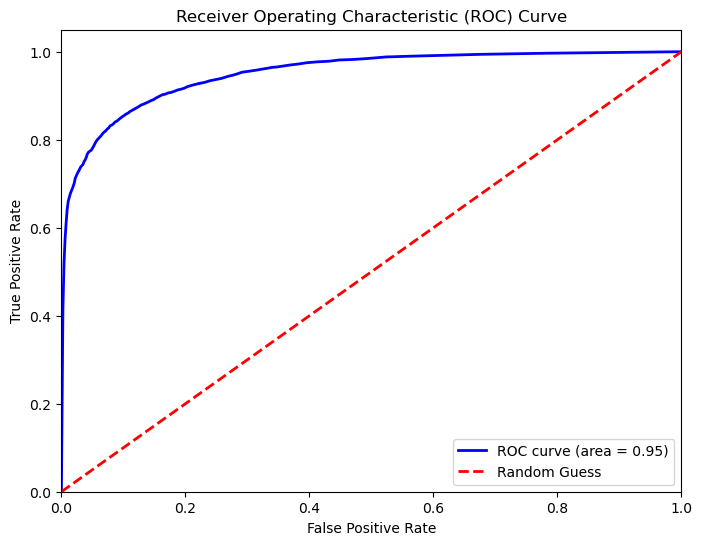

In [591]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions_proba = model_rf.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [592]:
from sklearn.linear_model import LogisticRegression

In [593]:
model_lr = LogisticRegression()

In [594]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [595]:
predictions_lr = model_lr.predict(X_test)

In [596]:
accuracy = model_lr.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.6317460317460317


In [597]:
precision_score(y_test, predictions_lr)

0.6517002310993727

In [598]:
recall_score(y_test, predictions_lr)

0.7113513513513513

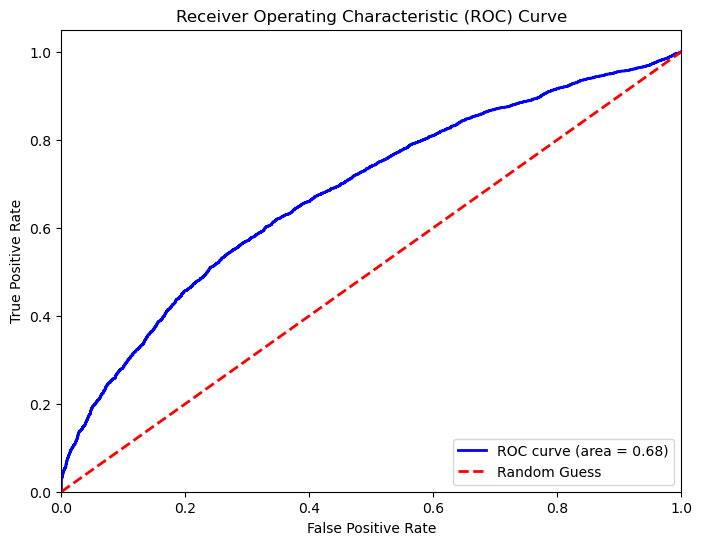

In [599]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions_proba = model_lr.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [600]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [601]:
predictions_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Accuracy on test set (SVM):", accuracy_svm)

Accuracy on test set (SVM): 0.7690476190476191
